<center><H1>Auto Data Set</H1></center><br><br>
<center><img src="https://img.freepik.com/premium-vector/set-futuristic-car-service-scanning-auto-data-analysis-intelligent-car-banner_74231-1065.jpg?w=1800" width="400px" height="400px"></center>


 <center> <H3> In association with An Introduction to Statistical Learning: With Applications in R (ISLR V 2)  </H3></center>
  <center> <H4 style="color:blue;">  Answer for Applied <b>Question 09 of Chapter 02</b> </H4></center>


<H3> About the Data Set </H3><br>

**Description**
Gas mileage, horsepower, and other information for 392 vehicles.

**Usage**
Auto

**Format**
A data frame with **392 observations** on the following 9 variables.

1. mpg: miles per gallon
2. cylinders: Number of cylinders between 4 and 8
3. displacement: Engine displacement (cu. inches)
4. horsepower: Engine horsepower
5. weight: Vehicle weight (lbs.)
6. acceleration: Time to accelerate from 0 to 60 mph (sec.)
7. year: Model year (modulo 100)
8. origin: Origin of car (1. American, 2. European, 3. Japanese)
9. name: Vehicle name

**Source**
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**References**
James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, https://www.statlearning.com, Springer-Verlag, New York


In [1]:
# load data set
Auto = read.csv("/kaggle/input/autompg-dataset/auto-mpg.csv", header=TRUE, na.strings='?',stringsAsFactors = T)
dim(Auto)

[1] 398   9

In [2]:
# omit nulls
Auto <- na.omit(Auto)
dim(Auto)

[1] 392   9

**(a) Which of the predictors are quantitative, and which are quali- tative?**

In [3]:
# check for data types
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...
 - attr(*, "na.action")= 'omit' Named int [1:6] 33 127 331 337 355 375
  ..- attr(*, "names")= chr [1:6] "33" "127" "331" "337" ...


**Quantitative**
* mpg
* cylinders
* displacement
* horsepower
* weight
* acceleration
* model.year
* origin

**Qualitative**
* car.name

**(b) What is the range of each quantitative predictor? You can an- swer this using the range() function.**

In [5]:
# Load the necessary libraries
library(dplyr)
# Select only the numerical columns from the data frame
num_vars <- select_if(Auto, is.numeric)
# Calculate the range for each numerical column
range_num_vars <- lapply(num_vars, range)
# Print the range for each numerical column
range_num_vars

$mpg
[1]  9.0 46.6

$cylinders
[1] 3 8

$displacement
[1]  68 455

$horsepower
[1]  46 230

$weight
[1] 1613 5140

$acceleration
[1]  8.0 24.8

$model.year
[1] 70 82

$origin
[1] 1 3

**(c) What is the mean and standard deviation of each quantitative predictor?**

In [7]:
# Calculate the mean and standard deviation for each column
stats <- num_vars %>% summarise_all(funs(mean, sd))
# Print the mean and standard deviation for each column
stats

mpg_mean,cylinders_mean,displacement_mean,horsepower_mean,weight_mean,acceleration_mean,model.year_mean,origin_mean,mpg_sd,cylinders_sd,displacement_sd,horsepower_sd,weight_sd,acceleration_sd,model.year_sd,origin_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.44592,5.471939,194.412,104.4694,2977.584,15.54133,75.97959,1.576531,7.805007,1.705783,104.644,38.49116,849.4026,2.758864,3.683737,0.8055182


**(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?**

In [8]:
# Subset the data frame to keep only the rows before the 10th observation and after the 85th observation
df_subset <- num_vars[c(1:9, 86:nrow(num_vars)), ]
# Calculate the mean and standard deviation for each column
stats2 <- df_subset %>% summarise_all(funs(range,mean, sd))
# Print the mean and standard deviation for each column
stats2

mpg_range,cylinders_range,displacement_range,horsepower_range,weight_range,acceleration_range,model.year_range,origin_range,mpg_mean,cylinders_mean,⋯,model.year_mean,origin_mean,mpg_sd,cylinders_sd,displacement_sd,horsepower_sd,weight_sd,acceleration_sd,model.year_sd,origin_sd
<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.0,3,68,46,1649,8.5,70,1,24.40443,5.373418,⋯,77.14557,1.601266,7.867283,1.654179,99.67837,35.70885,811.3002,2.693721,3.106217,0.81991
46.6,8,455,230,4997,24.8,82,3,24.40443,5.373418,⋯,77.14557,1.601266,7.867283,1.654179,99.67837,35.70885,811.3002,2.693721,3.106217,0.81991


**(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.**

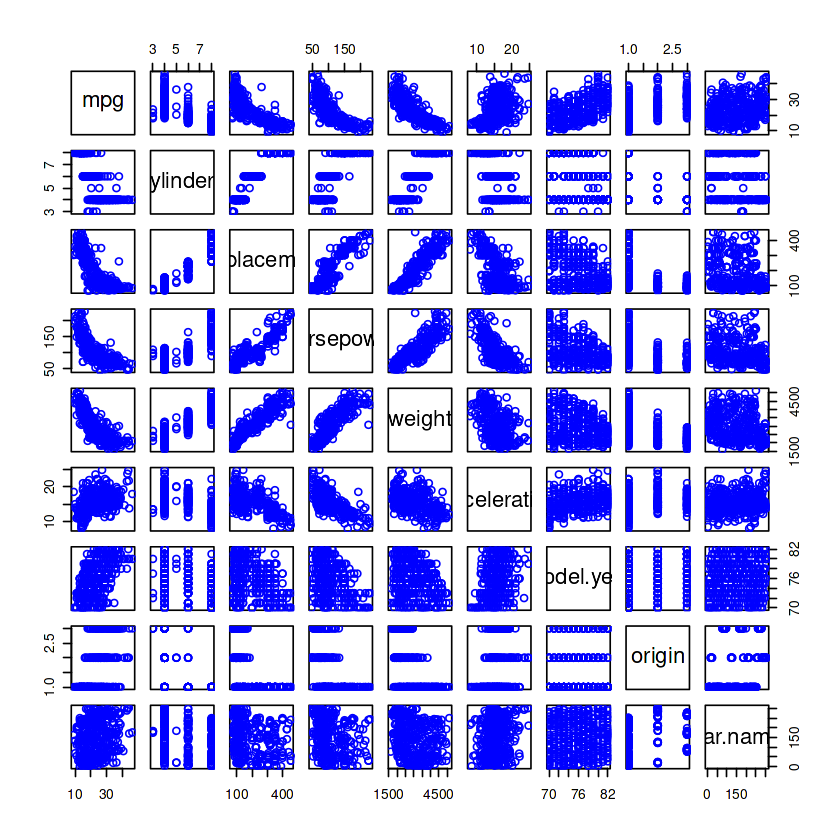

In [10]:
# scatterplot matrix
pairs(Auto,col="blue")

The plots suggest the below;
* There is a negative relationship between mpg and placement,horsepower,weight
* There is a positive relationship between placement and horsepower, weight
* There is a negative relationship between placement and accelartion
* There is a positive relationship between horsepower and weight
* There is a negative relationship between horsepower and accelartion

**f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.**

**Yes**

If the relationship between the variables is strong (e.g., if there is a clear pattern or trend in the data), then it is likely that those variables will be useful in predicting the value of the target variable (mpg in this case). On the other hand, if there is no clear relationship between the variables, then it is less likely that those variables will be useful for prediction.

It is also important to consider the type of relationship between the variables. For example, a linear relationship (where the variables are correlated and the data points form a straight line on a scatterplot) may be easier to model and predict than a nonlinear relationship (where the variables are correlated but the data points do not form a straight line).

**mpg has a strong negative relationship with placement,horsepower and weight**